In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the CSV file
df = pd.read_csv("index.csv")

# Displaying the first 5 rows of the dataframe
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [4]:
# Convert columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
# Extract day, day name, and hour
df['days'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
# Display the first few rows
df.head()

,date,datetime,cash_type,card,money,coffee_name,days,day_name,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,1,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,1,Friday,13


In [5]:
coffee_names = df['coffee_name'].unique()
coffee_names

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [6]:
overall_sales = df.groupby(['coffee_name'])['money'].sum().reset_index()
overall_sales

,coffee_name,money
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08
5,Espresso,1100.62
6,Hot Chocolate,2778.48
7,Latte,9009.14


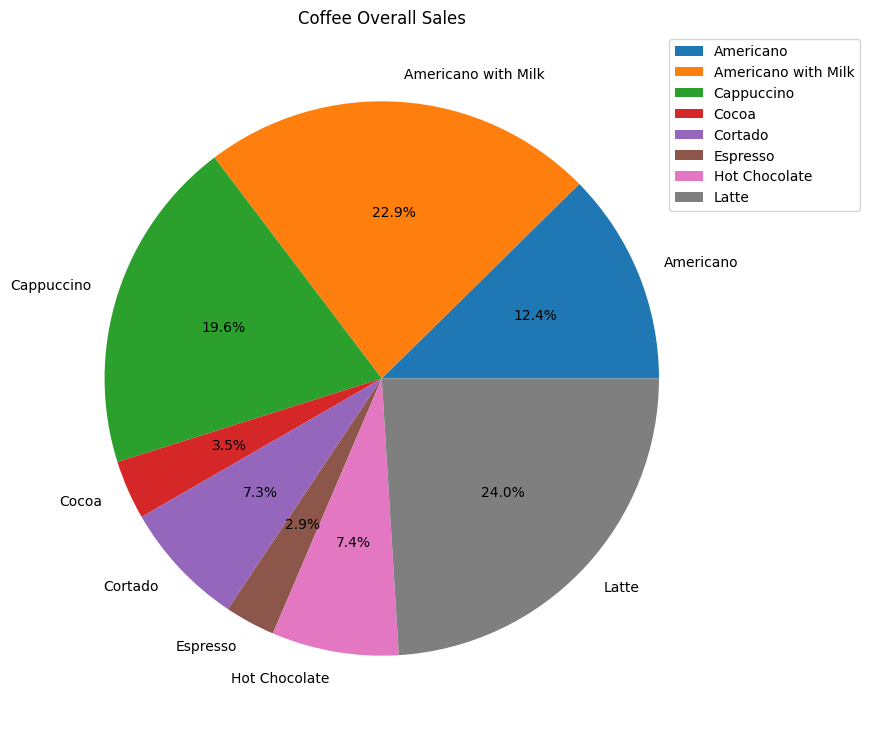

In [7]:
overall_sales.plot.pie(autopct='%1.1f%%', y = 'money', labels = overall_sales['coffee_name'].unique(), title = 'Coffee Overall Sales', ylabel = '', figsize=(9,9))
position = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

In [8]:
print("""Insights:
1.Latte, Americano with Milk, and Cappuccino account for 66.4% of sales.
2.This leaves an opportunity for growth, as the remaining 5 coffee types cover 33.6%. We can promote other coffee types or flavors to diversify sales.""")

Insights:
1.Latte, Americano with Milk, and Cappuccino account for 66.4% of sales.
2.This leaves an opportunity for growth, as the remaining 5 coffee types cover 33.6%. We can promote other coffee types or flavors to diversify sales.


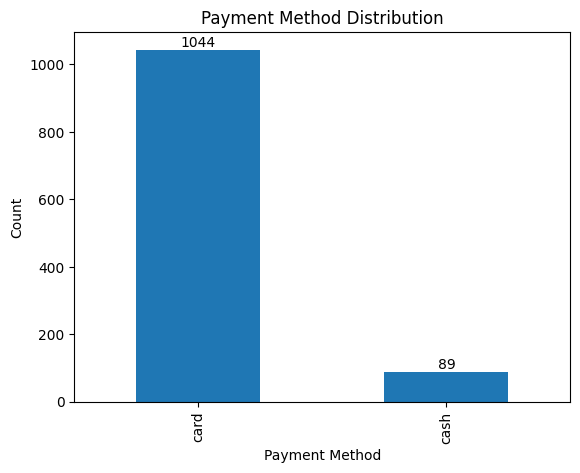

In [9]:
payment_type = df['cash_type'].value_counts().plot.bar(title='Payment Method Distribution', xlabel='Payment Method', ylabel='Count')
for i, (cash_type, count) in enumerate(df['cash_type'].value_counts().items()):
    payment_type.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [10]:
print("""Insights:
1. The business may want to consider investing more in card payment infrastructure or digital payment options.
2. The low number of cash payments could indicate a shift towards a cashless society or a specific customer preference.
3. It may be worth exploring why some customers still prefer cash payments (e.g., security concerns, lack of digital payment access).""")

Insights:
1. The business may want to consider investing more in card payment infrastructure or digital payment options.
2. The low number of cash payments could indicate a shift towards a cashless society or a specific customer preference.
3. It may be worth exploring why some customers still prefer cash payments (e.g., security concerns, lack of digital payment access).


In [11]:
df['month'] = df['date'].dt.month
df.head()

,date,datetime,cash_type,card,money,coffee_name,days,day_name,hour,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1,Friday,10,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,1,Friday,13,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,1,Friday,13,3


In [12]:
monthly_sales = df.pivot_table(index='month', columns='coffee_name', values='money', aggfunc='sum')
monthly_sales['total_sales'] = monthly_sales.sum(axis=1)
monthly_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total_sales
month,,,,,,,,,
3,1044.80,1154.00,780.50,232.20,869.20,241.00,854.00,1874.50,7050.20
4,1001.94,1407.74,1659.44,232.82,548.48,171.00,506.02,1193.12,6720.56
5,1348.80,1908.28,2078.44,340.76,474.64,185.14,529.36,2198.00,9063.42
6,390.88,2268.12,1735.12,189.88,530.48,230.20,528.08,1886.00,7758.76
7,858.12,1863.80,1079.64,300.28,322.28,273.28,361.02,1857.52,6915.94


In [13]:
print("""Month 5 had a significant increase, which might be due to seasonal factors, marketing efforts, or other external influences.
Months 6 and 7 showed decreases, but Month 8 rebounded slightly.
""")

print("""Some potential questions to explore:
What could have caused the spike in sales in month 5? (e.g., marketing campaign, seasonal demand, new product release)
What factors might be contributing to the overall decline in sales? (e.g., increased competition, economic changes, customer preferences)
Are there any opportunities to capitalize on the success of month 5?""")

Month 5 had a significant increase, which might be due to seasonal factors, marketing efforts, or other external influences.
Months 6 and 7 showed decreases, but Month 8 rebounded slightly.

Some potential questions to explore:
What could have caused the spike in sales in month 5? (e.g., marketing campaign, seasonal demand, new product release)
What factors might be contributing to the overall decline in sales? (e.g., increased competition, economic changes, customer preferences)
Are there any opportunities to capitalize on the success of month 5?


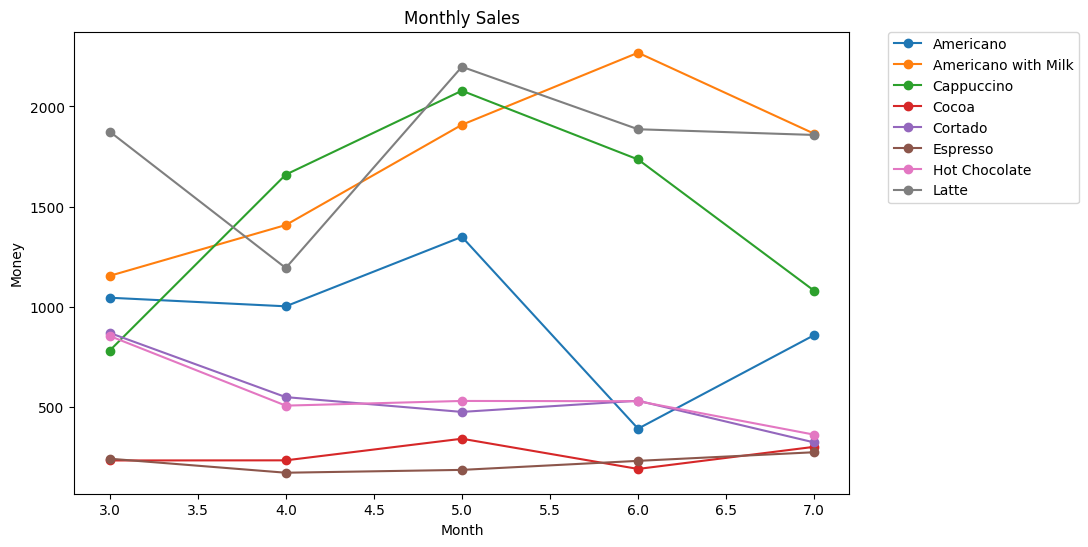

In [14]:
monthly_sales.loc[:, monthly_sales.columns != 'total_sales'].plot(xlabel='Month',ylabel = 'Money', kind='line', marker='o', title = 'Monthly Sales',  figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [15]:
print("""Insights:
Hot Chocolate's decline might be due to seasonal preferences or competition from other drinks.
Cortado's increase suggests growing popularity or effective marketing.
The stability of other drinks indicates a loyal customer base.

Recommendations:
Investigate reasons for Hot Chocolate's decline and consider promotions or reformulation.
Capitalize on Cortado's popularity with targeted marketing or limited-time offers.
Monitor customer preferences and adjust your menu or promotions accordingly.
""")

Insights:
Hot Chocolate's decline might be due to seasonal preferences or competition from other drinks.
Cortado's increase suggests growing popularity or effective marketing.
The stability of other drinks indicates a loyal customer base.

Recommendations:
Investigate reasons for Hot Chocolate's decline and consider promotions or reformulation.
Capitalize on Cortado's popularity with targeted marketing or limited-time offers.
Monitor customer preferences and adjust your menu or promotions accordingly.



In [16]:
unit_sales = df.groupby(['month','coffee_name']).size().reset_index(name='units_sold').pivot(index='month', columns='coffee_name', values='units_sold')
unit_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
month,,,,,,,,
3,36,34,20,6,30,10,22,48
4,35,42,43,6,19,7,13,31
5,48,58,55,9,17,8,14,58
6,14,69,46,5,19,10,14,50
7,36,65,32,9,14,14,11,56


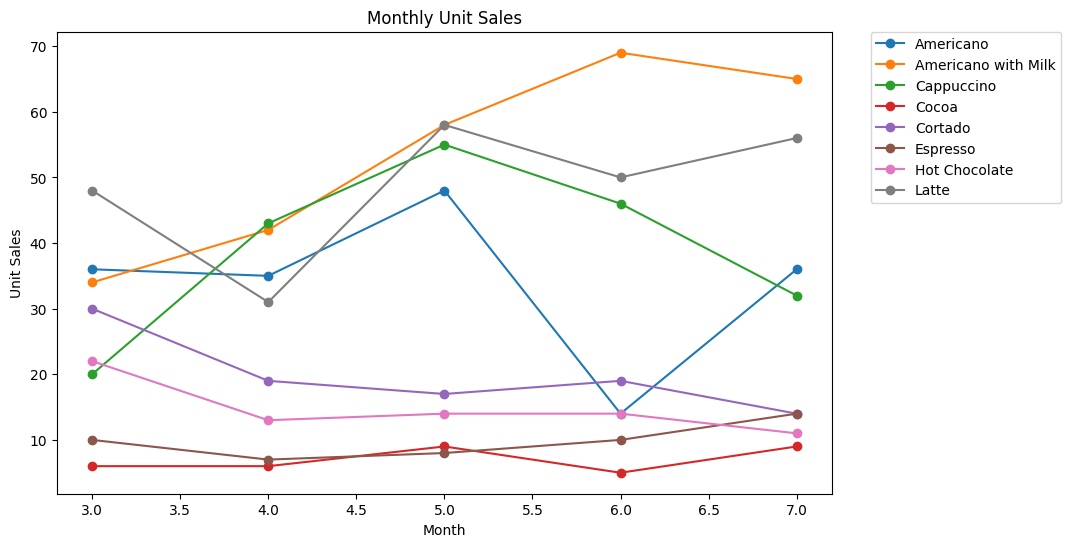

In [17]:
unit_sales.plot(xlabel='Month',ylabel = 'Unit Sales', kind='line', marker='o', title = 'Monthly Unit Sales', figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [18]:
print('''This consistency between sales numbers and sales units indicates that the trends are not solely due to price fluctuations or discounts, 
      but rather reflect changes in customer demand or preferences.''')

This consistency between sales numbers and sales units indicates that the trends are not solely due to price fluctuations or discounts, 
      but rather reflect changes in customer demand or preferences.


In [19]:
df = df.rename(columns={'datetime': 'time'})
df['time'] = pd.to_datetime(df['time'])
df.head()

,date,time,cash_type,card,money,coffee_name,days,day_name,hour,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1,Friday,10,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,Friday,12,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,1,Friday,13,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,1,Friday,13,3


In [20]:
hourly_sales = df.groupby(df['time'].dt.hour)['coffee_name'].count().reset_index()
hourly_sales = hourly_sales.rename(columns={'time': 'hour', 'coffee_name' : 'unit_sales'})
hourly_sales

,hour,unit_sales
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


In [21]:
monthly_hourly_sales = df.groupby([df['month'], df['time'].dt.hour])['coffee_name'].count().reset_index()
monthly_hourly_sales = monthly_hourly_sales.rename(columns={'time': 'hour', 'coffee_name' : 'unit_sales'})
monthly_hourly_sales

,month,hour,unit_sales
0,3,7,2
1,3,9,1
2,3,10,34
3,3,11,21
4,3,12,25
...,...,...,...
66,7,18,6
67,7,19,15
68,7,20,12
69,7,21,17


In [22]:
pivot_table = monthly_hourly_sales.pivot_table(index='hour', columns='month', values='unit_sales', aggfunc='sum')
hourly_sales_sum = hourly_sales.groupby('hour').sum()
average_hourly_sales = hourly_sales_sum/6
average_hourly_sales = average_hourly_sales.round()
pivot_table = pivot_table.assign(average_sale=average_hourly_sales).fillna(0)
pivot_table

month,3,4,5,6,7,average_sale
hour,,,,,,
7,2.0,0.0,4.0,2.0,5.0,2.0
8,0.0,0.0,12.0,14.0,18.0,7.0
9,1.0,0.0,11.0,12.0,26.0,8.0
10,34.0,29.0,24.0,23.0,23.0,22.0
11,21.0,17.0,23.0,16.0,26.0,17.0
12,25.0,19.0,11.0,18.0,14.0,14.0
13,25.0,20.0,17.0,4.0,12.0,13.0
14,19.0,17.0,20.0,9.0,11.0,13.0
15,14.0,17.0,19.0,9.0,6.0,11.0


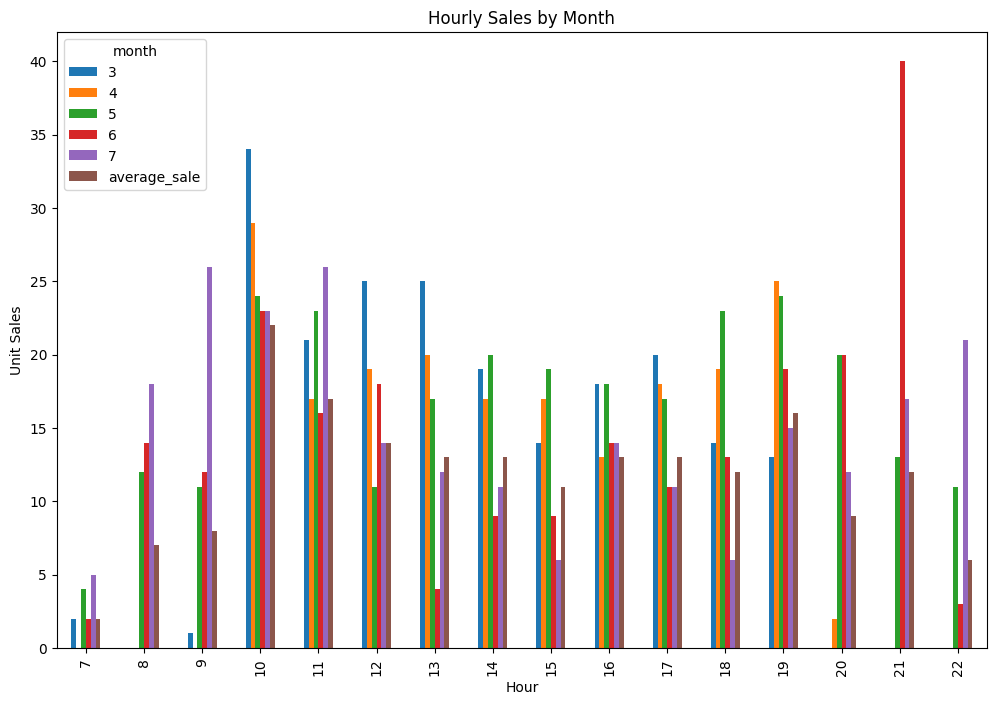

In [23]:
# Create a bar chart
pivot_table.plot(kind='bar', figsize=(12, 8), title='Hourly Sales by Month', ylabel = 'Unit Sales', xlabel = 'Hour')

# Show the plot
plt.show()

In [24]:
print("""Insights:
1. Optimize staffing: Ensure adequate staff during peak hours (7-9 am, 11 am-12 pm, 20-22 pm) and adjust staffing during slower periods.
2. Targeted promotions: Consider running promotions or offering discounts during slower hours (10 am, 13-14 pm, 16-19 pm) to boost sales.
3. Inventory management: Manage inventory levels accordingly, ensuring sufficient stock during peak hours and reducing waste during slower periods.
4. Customer engagement: Focus on engaging customers during peak hours, and consider ways to attract customers during slower periods.
""")

Insights:
1. Optimize staffing: Ensure adequate staff during peak hours (7-9 am, 11 am-12 pm, 20-22 pm) and adjust staffing during slower periods.
2. Targeted promotions: Consider running promotions or offering discounts during slower hours (10 am, 13-14 pm, 16-19 pm) to boost sales.
3. Inventory management: Manage inventory levels accordingly, ensuring sufficient stock during peak hours and reducing waste during slower periods.
4. Customer engagement: Focus on engaging customers during peak hours, and consider ways to attract customers during slower periods.



In [25]:
df['day'] = df['date'].dt.day_name()
weekday_df = df[df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_df = df[df['day'].isin(['Saturday', 'Sunday'])]

In [26]:
print("Weekend average sales:", weekend_df['money'].mean())
print("Weekday average sales:", weekday_df['money'].mean())
print("Both averages are around 32, indicating consistent sales performance across the week.")

Weekend average sales: 33.66052459016393
Weekday average sales: 32.901473429951686
Both averages are around 32, indicating consistent sales performance across the week.


In [27]:
# Filter data to only include card-paying customers
card_customers = df[df['card'].notna()]

# Group by card and count unique occurrences
card_counts = card_customers.groupby('card').size().reset_index(name='count')

# Filter to only include customers with more than one purchase
returning_customers = card_counts[card_counts['count'] > 1]

# Calculate returning customer percentage
returning_customer_percentage = (len(returning_customers) / len(card_counts)) * 100
print("Returining customer percentage",round(returning_customer_percentage,2),'%')

Returining customer percentage 37.0 %


In [28]:
card_counts_preferance = card_customers.groupby(['card', 'coffee_name'])['coffee_name'].count().reset_index(name='count')
# Sort by count in descending order
returning_customers_preferance = card_counts_preferance[card_counts_preferance['count'] > 1].sort_values(by='count', ascending=False)
returning_customers_preferance

,card,coffee_name,count
22,ANON-0000-0000-0012,Americano,40
19,ANON-0000-0000-0009,Latte,23
150,ANON-0000-0000-0097,Americano with Milk,21
14,ANON-0000-0000-0009,Americano with Milk,20
23,ANON-0000-0000-0012,Americano with Milk,20
...,...,...,...
561,ANON-0000-0000-0416,Americano with Milk,2
566,ANON-0000-0000-0421,Hot Chocolate,2
568,ANON-0000-0000-0423,Americano with Milk,2
585,ANON-0000-0000-0437,Americano with Milk,2


In [29]:
returning_customers_preferance.groupby('coffee_name').count()

,card,count
coffee_name,,
Americano,20,20
Americano with Milk,36,36
Cappuccino,26,26
Cocoa,5,5
Cortado,11,11
Espresso,3,3
Hot Chocolate,10,10
Latte,29,29


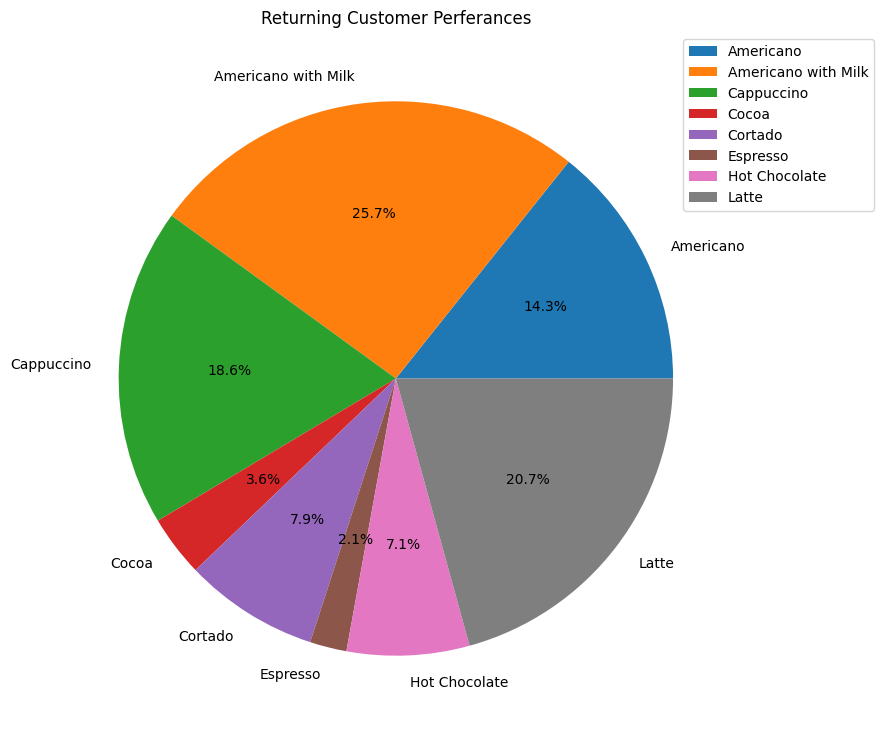

In [30]:
returning_customers_preferance.groupby('coffee_name')['card'].count().plot.pie(autopct='%1.1f%%', title='Returning Customer Perferances', ylabel='', figsize=(9,9))
position = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

In [31]:
print("""Insights:
1. Americano with Milk is the most popular choice.
2. Latte is the second most popular.
3. Cappuccino is third.
4. Americano (without milk) has 23 purchase by returning customers.
5. Cortado and Hot Chocolate have a moderate number of purchase from returning customers (14 and 10, respectively).
6. Cocoa and Espresso have the fewest sale from returning customers (8 and 5, respectively).

This suggests that returning customers' preferences are aligned with overall sales data. 
This is a good sign, as it indicates that your loyal customers are driving a significant portion of your sales.
""")

Insights:
1. Americano with Milk is the most popular choice.
2. Latte is the second most popular.
3. Cappuccino is third.
4. Americano (without milk) has 23 purchase by returning customers.
5. Cortado and Hot Chocolate have a moderate number of purchase from returning customers (14 and 10, respectively).
6. Cocoa and Espresso have the fewest sale from returning customers (8 and 5, respectively).

This suggests that returning customers' preferences are aligned with overall sales data. 
This is a good sign, as it indicates that your loyal customers are driving a significant portion of your sales.



C:\Users\aashi\AppData\Local\Temp\ipykernel_2836\920254798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_month.index, y=sales_month, palette='crest')


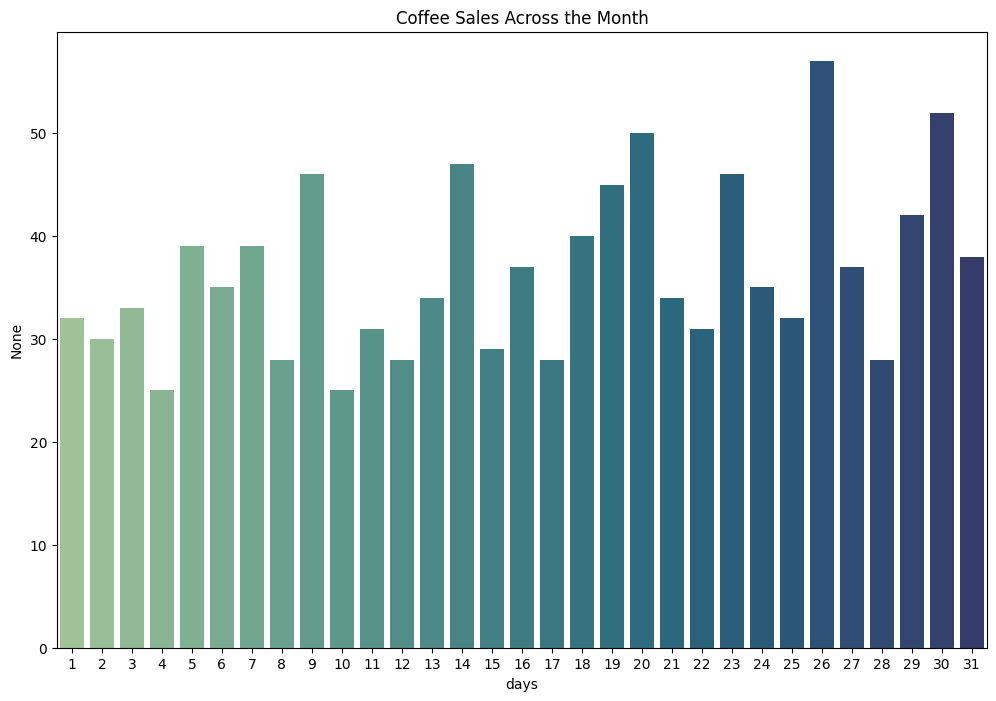

In [32]:
sales_month = df.sort_values('days').groupby('days').size()

plt.figure(figsize=(12,8))
plt.title('Coffee Sales Across the Month')
sns.barplot(x=sales_month.index, y=sales_month, palette='crest')
plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_2836\2956120390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='crest')


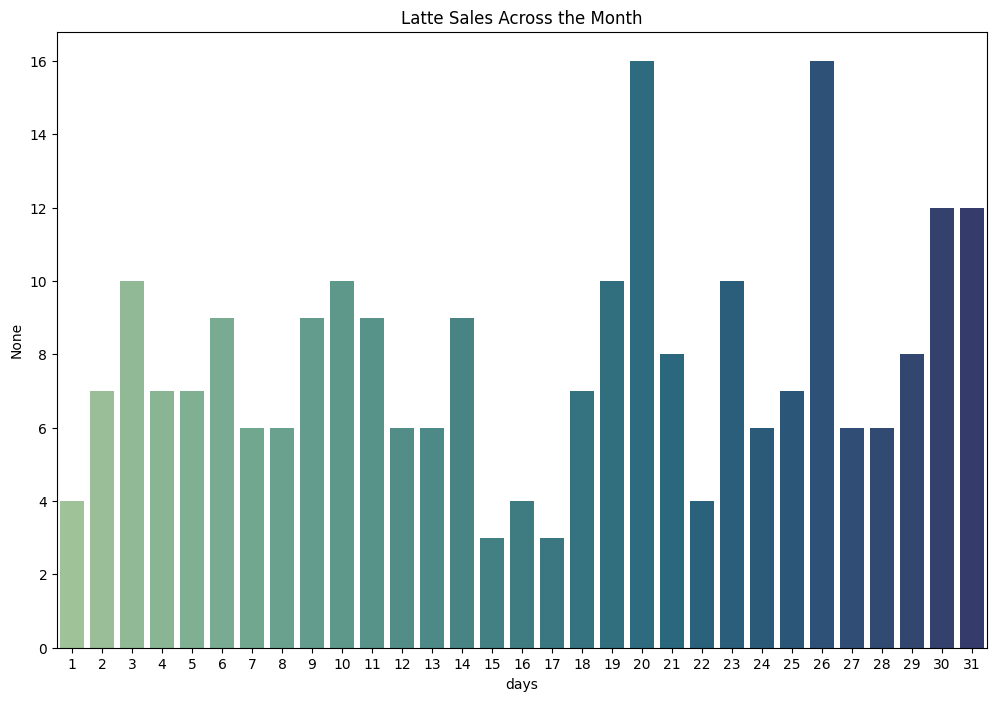

C:\Users\aashi\AppData\Local\Temp\ipykernel_2836\2956120390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='crest')


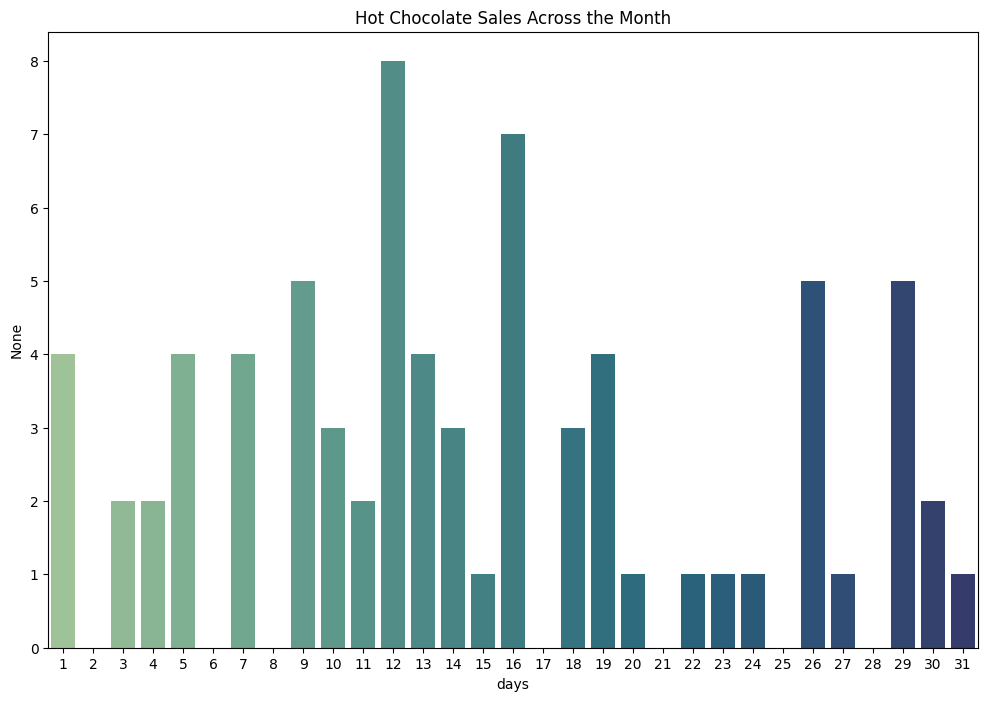

C:\Users\aashi\AppData\Local\Temp\ipykernel_2836\2956120390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='crest')


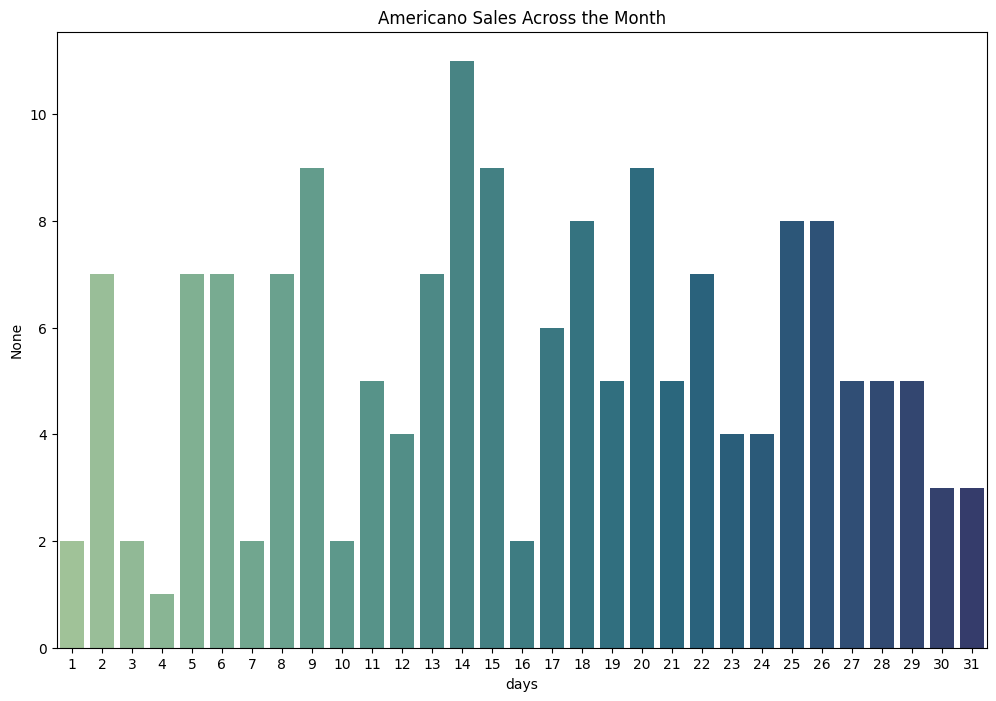

In [33]:
for coffee_name in coffee_names:
    sales = df[df['coffee_name'] == coffee_name].groupby('days').size()
    sales = sales.reindex(index = range(1,32))
    plt.figure(figsize=(12,8))
    plt.title(f'{coffee_name} Sales Across the Month')
    sns.barplot(x=sales.index, y=sales, palette='crest')
    plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\3338866452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_week.index, y=sales_week, palette='flare')


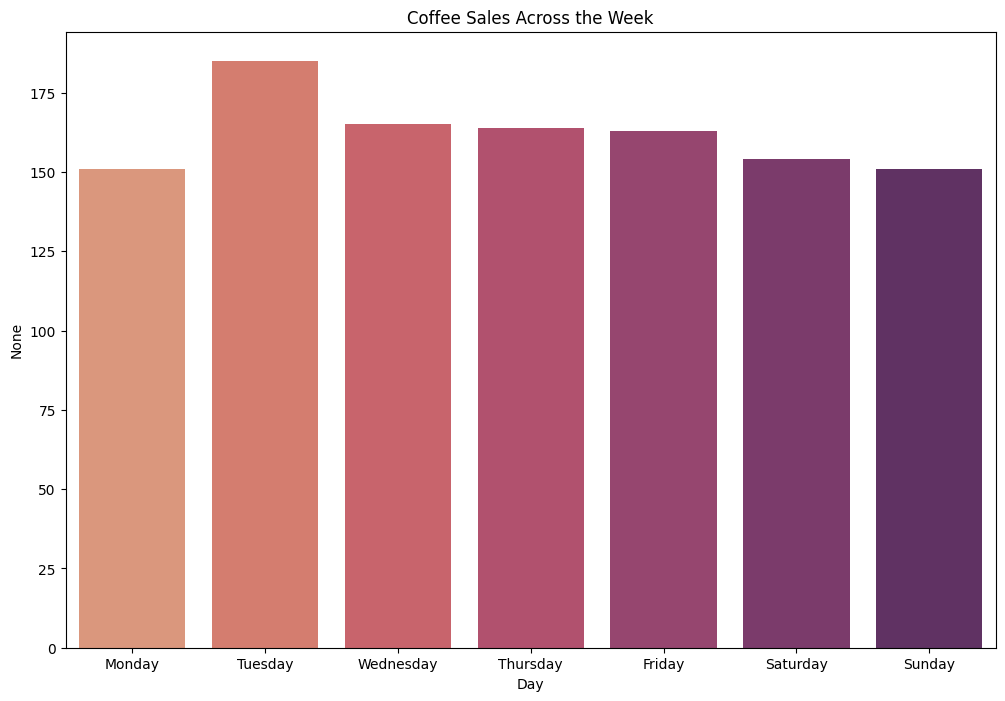

In [94]:
sales_week = df.groupby('day_name').size()
sales_week = sales_week.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,8))
plt.title('Coffee Sales Across the Week')
sns.barplot(x=sales_week.index, y=sales_week, palette='flare')
plt.xlabel('Day')
plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


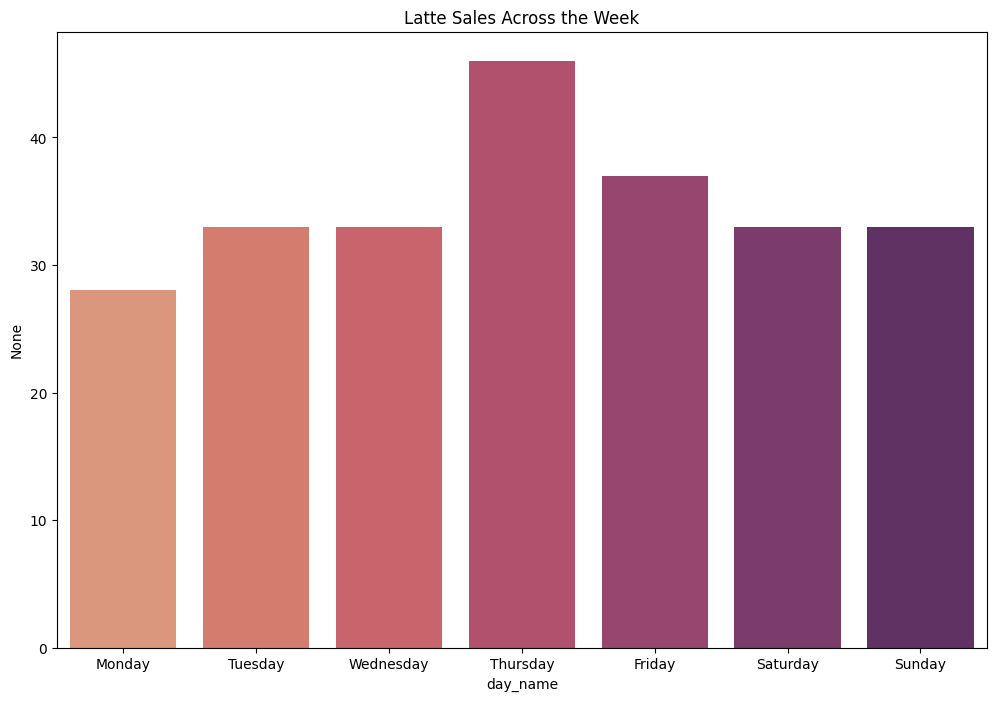

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


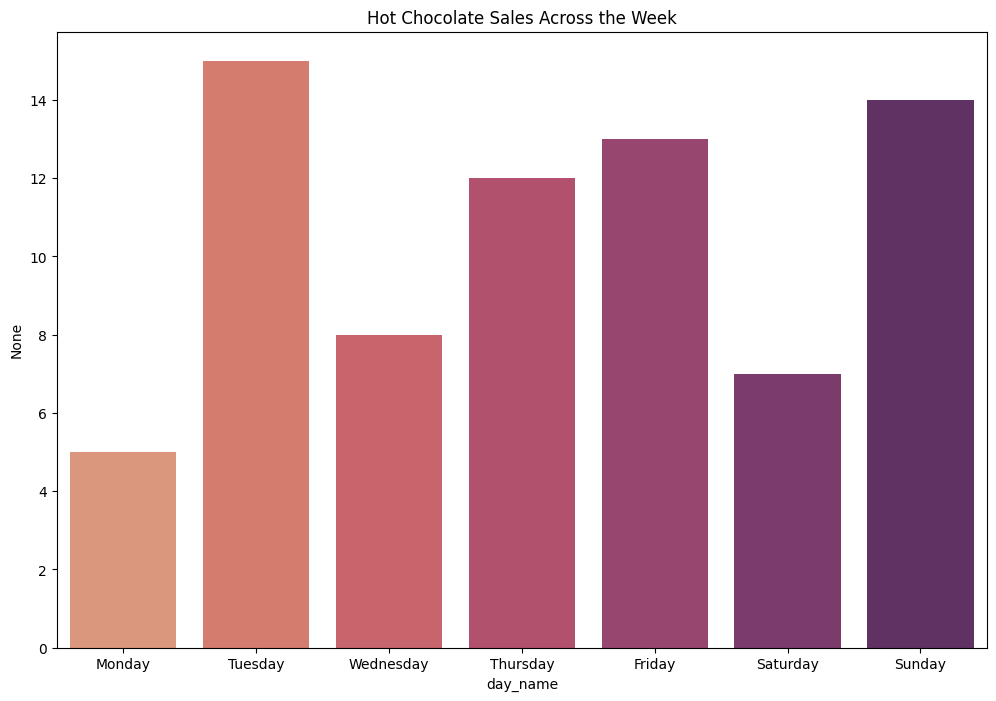

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


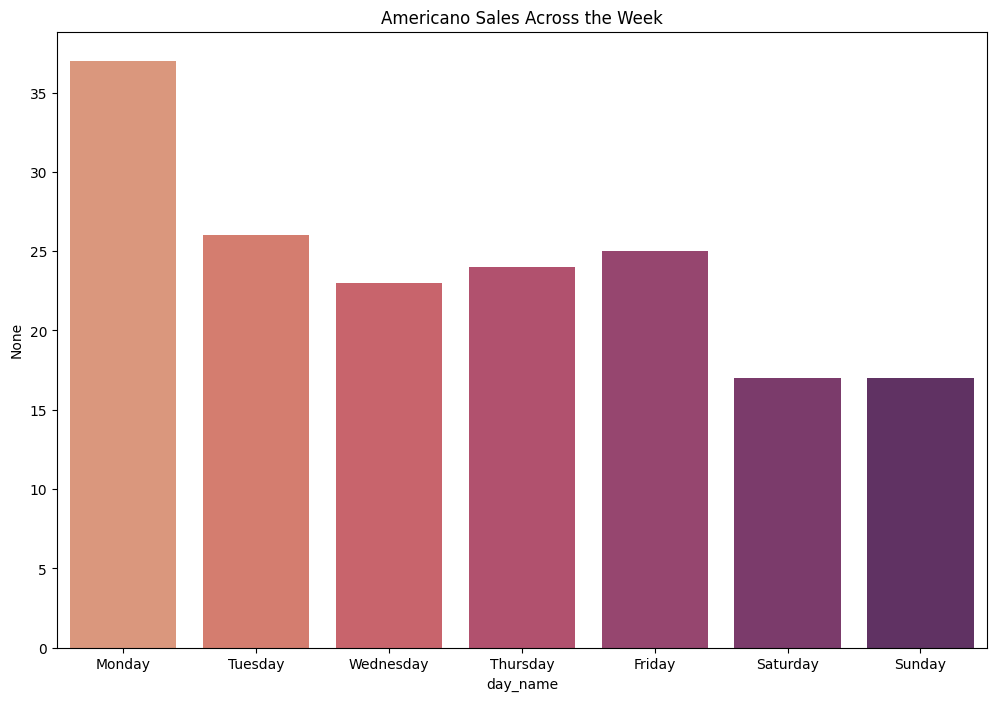

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


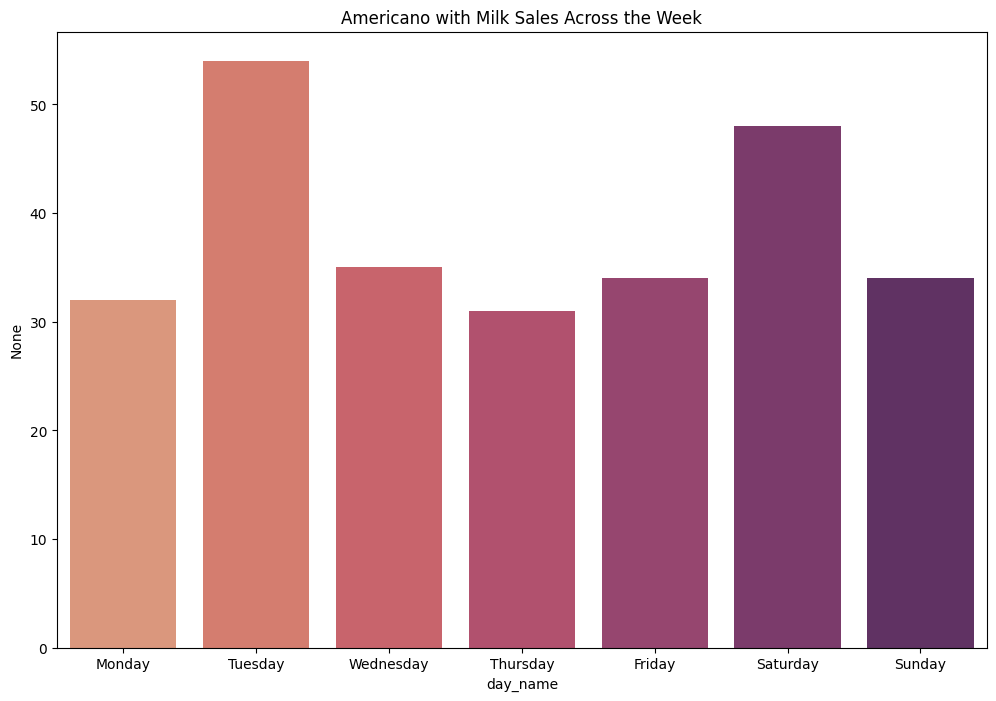

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


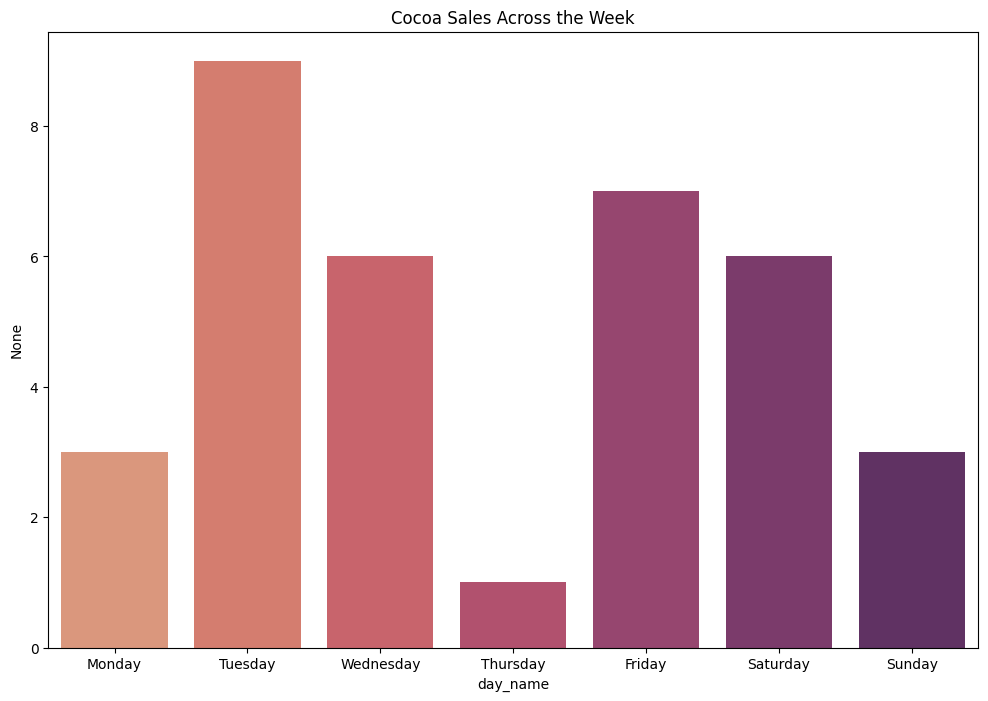

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


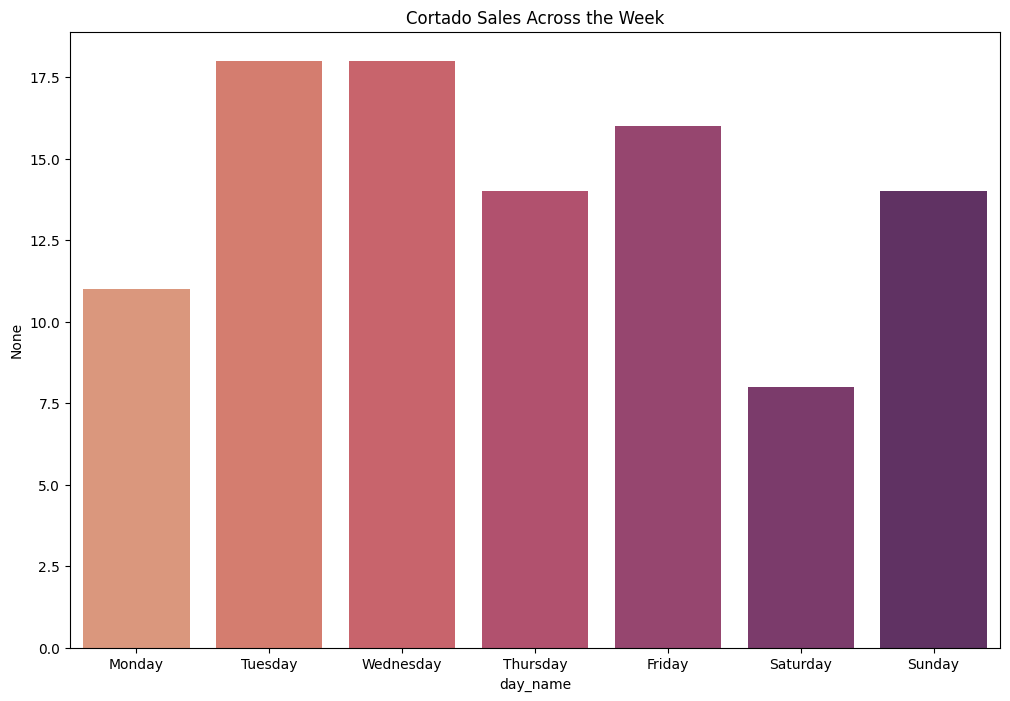

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


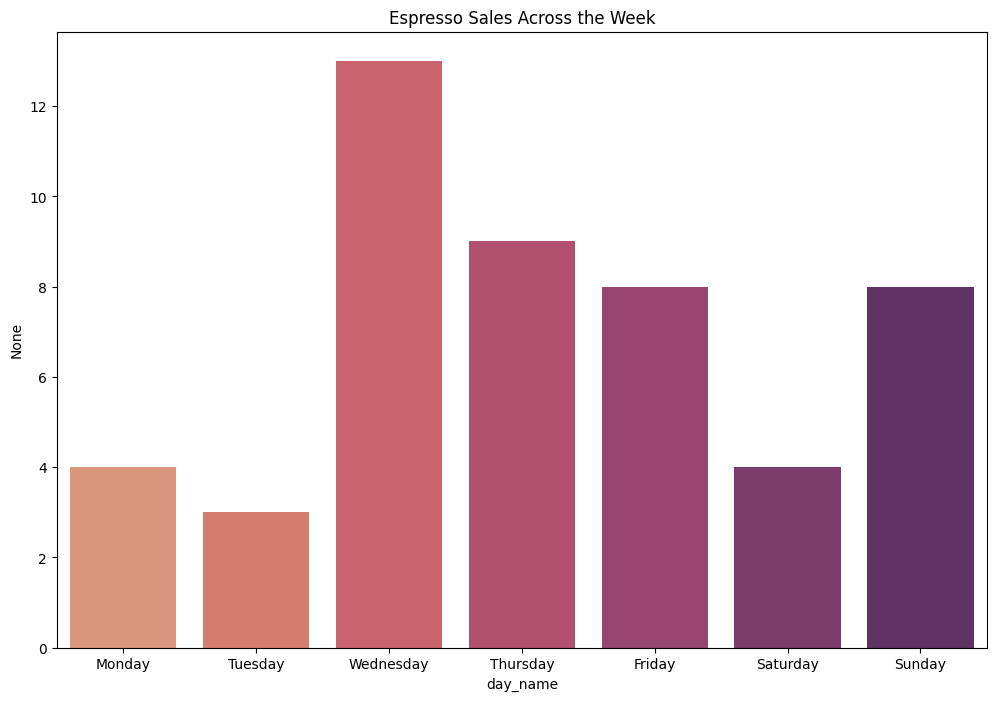

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\4266410865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='flare')


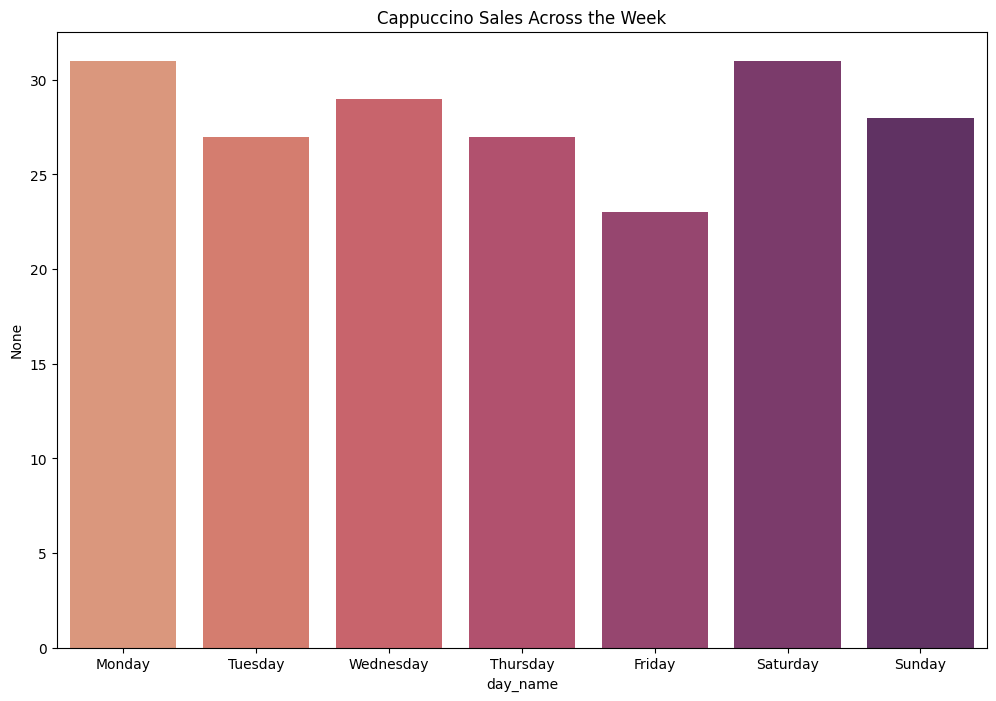

In [95]:
for coffee_name in coffee_names:
    sales = df[df['coffee_name'] == coffee_name].groupby('day_name').size()
    sales = sales.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.figure(figsize=(12,8))
    plt.title(f'{coffee_name} Sales Across the Week')
    sns.barplot(x=sales.index, y=sales, palette='flare')
    plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\3484784753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_day.index, y=sales_day, palette='viridis')


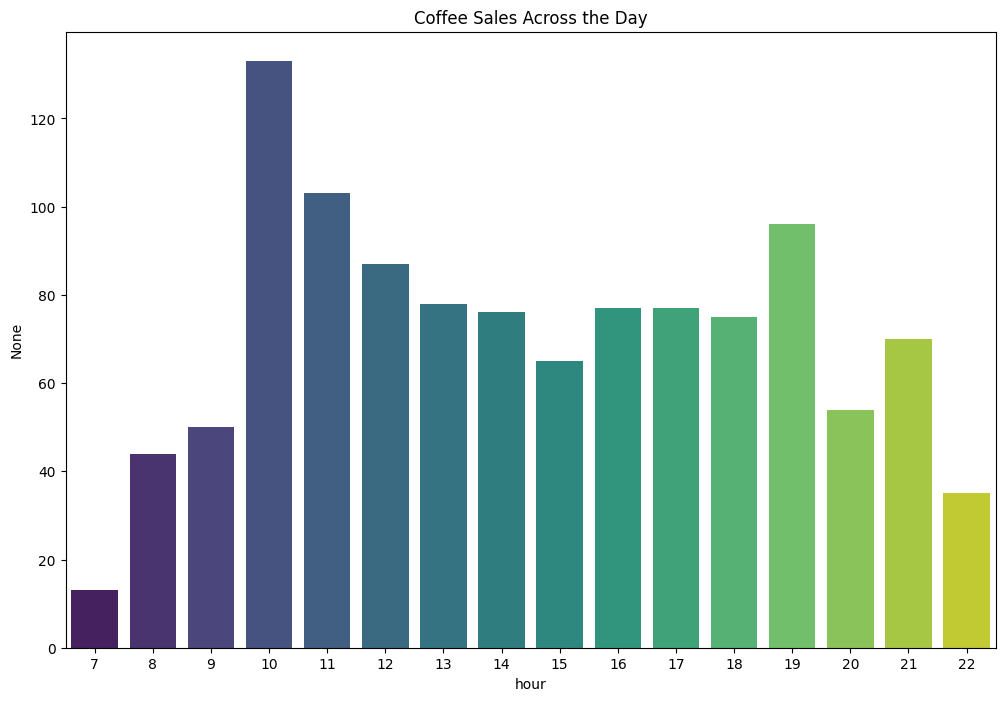

In [96]:
sales_day = df.sort_values('hour').groupby('hour').size()

plt.figure(figsize=(12,8))
plt.title('Coffee Sales Across the Day')
sns.barplot(x=sales_day.index, y=sales_day, palette='viridis')
plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


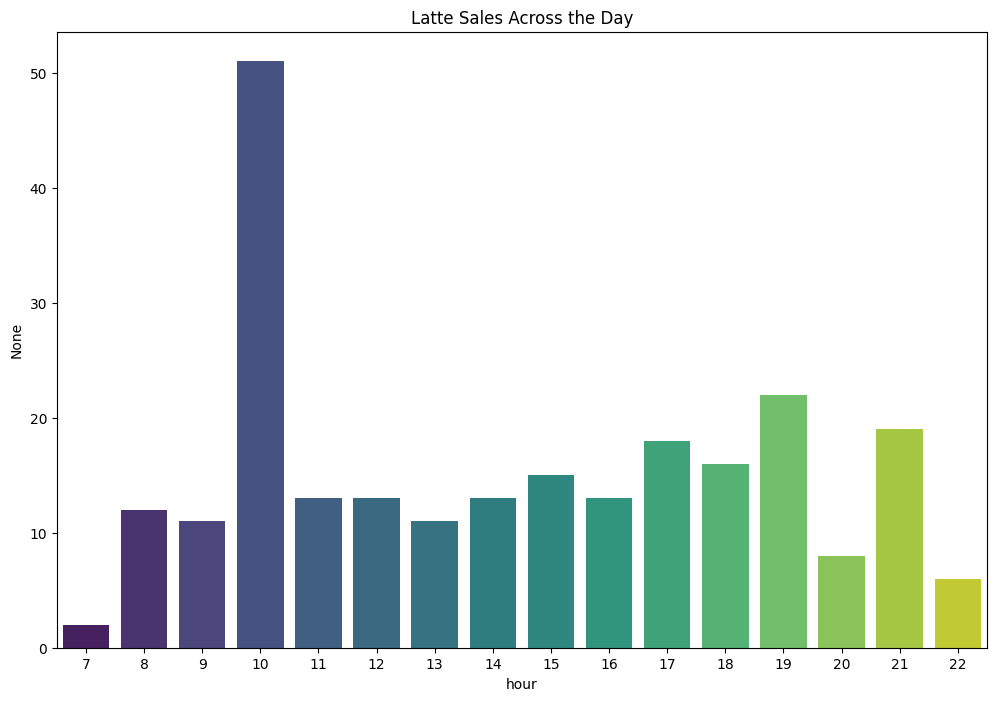

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


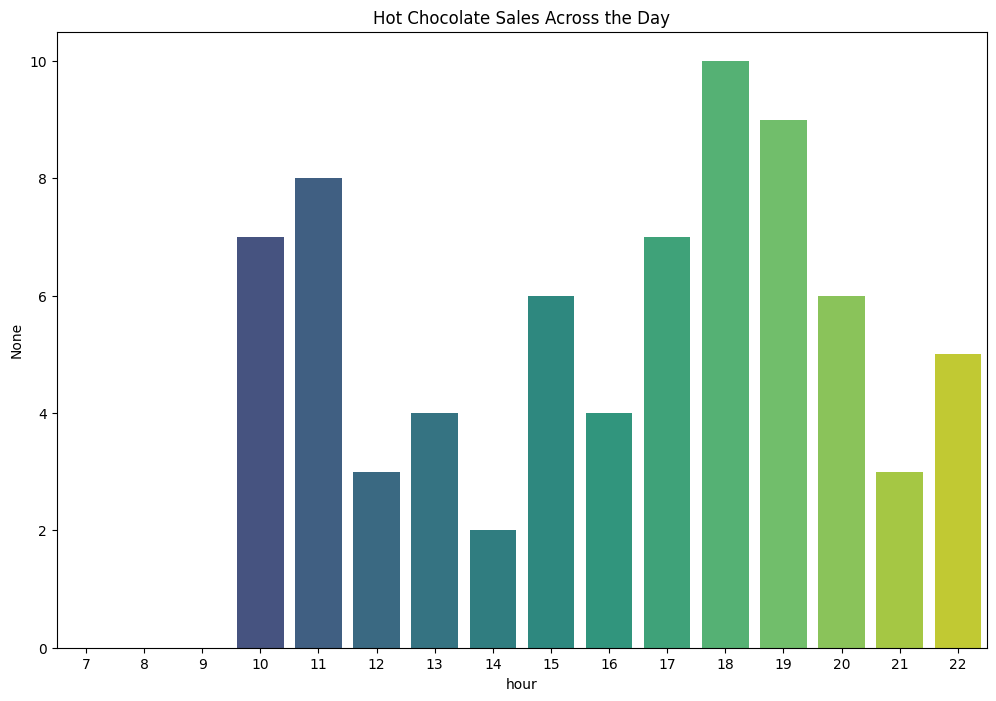

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


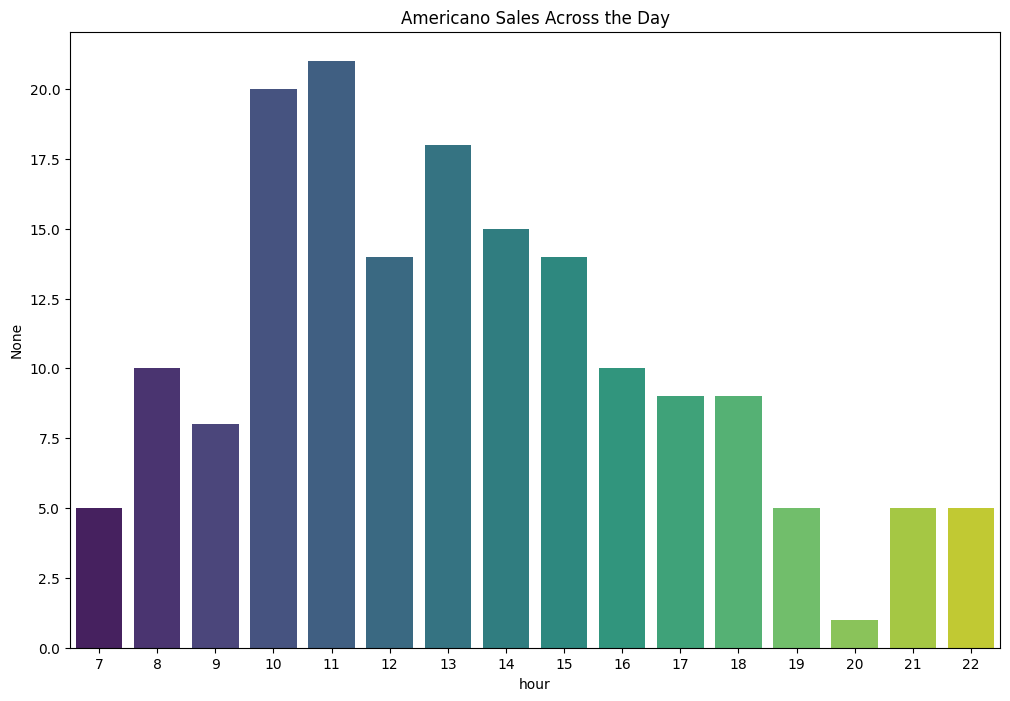

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


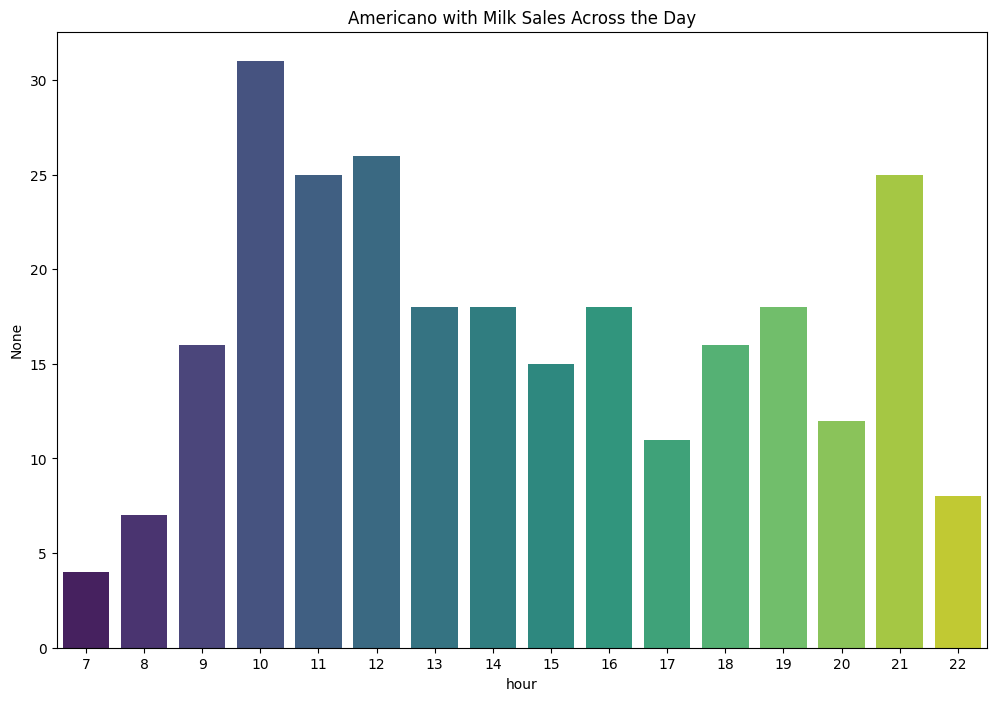

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


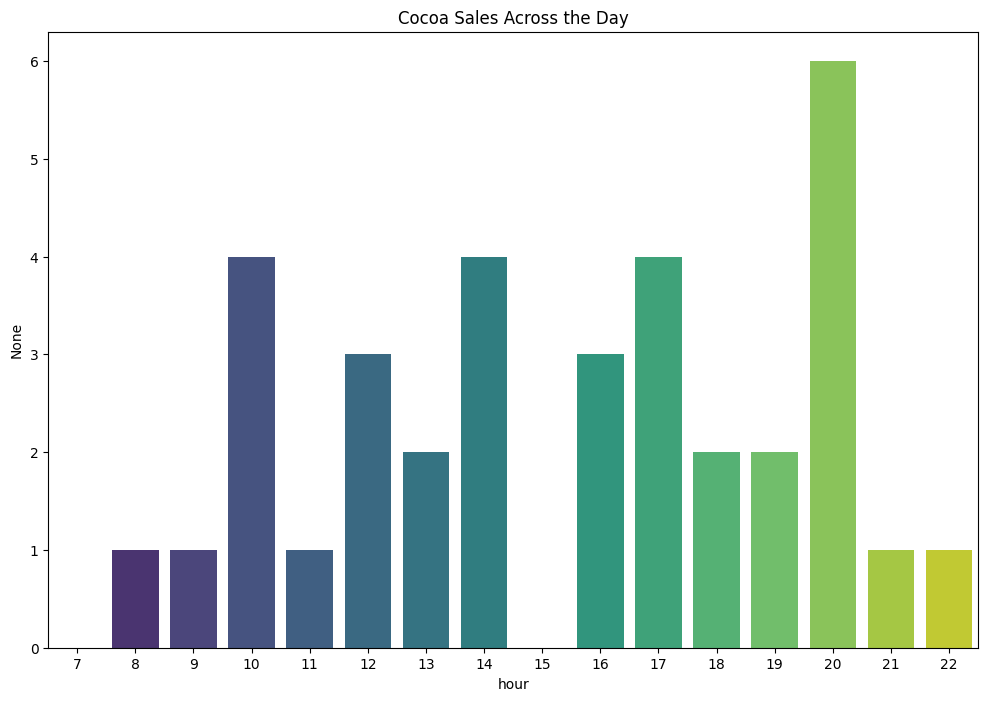

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


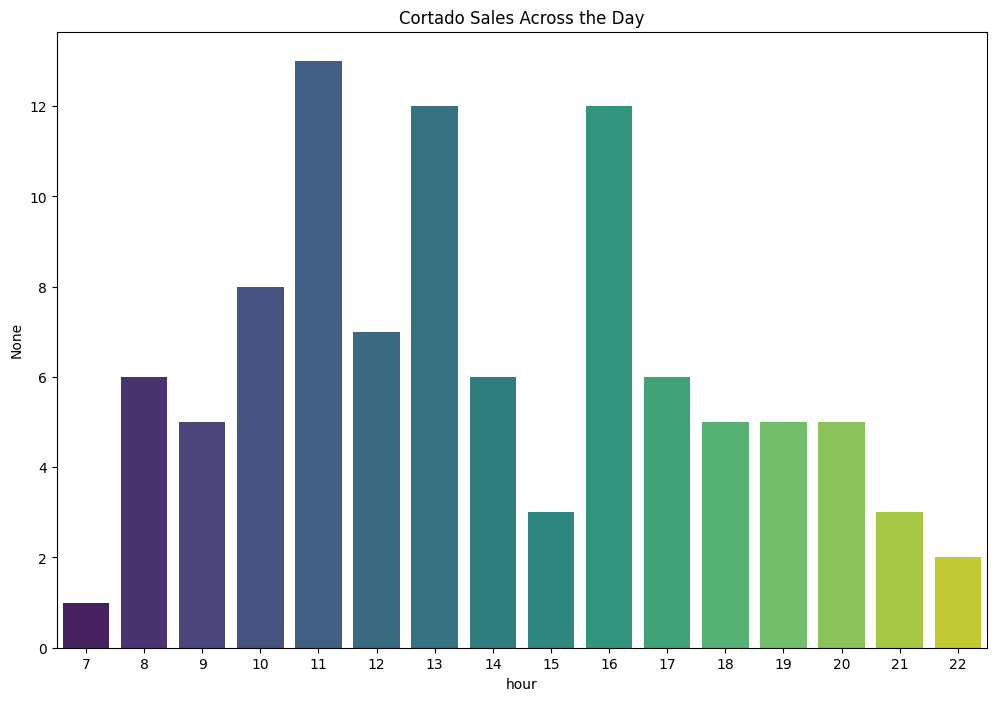

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


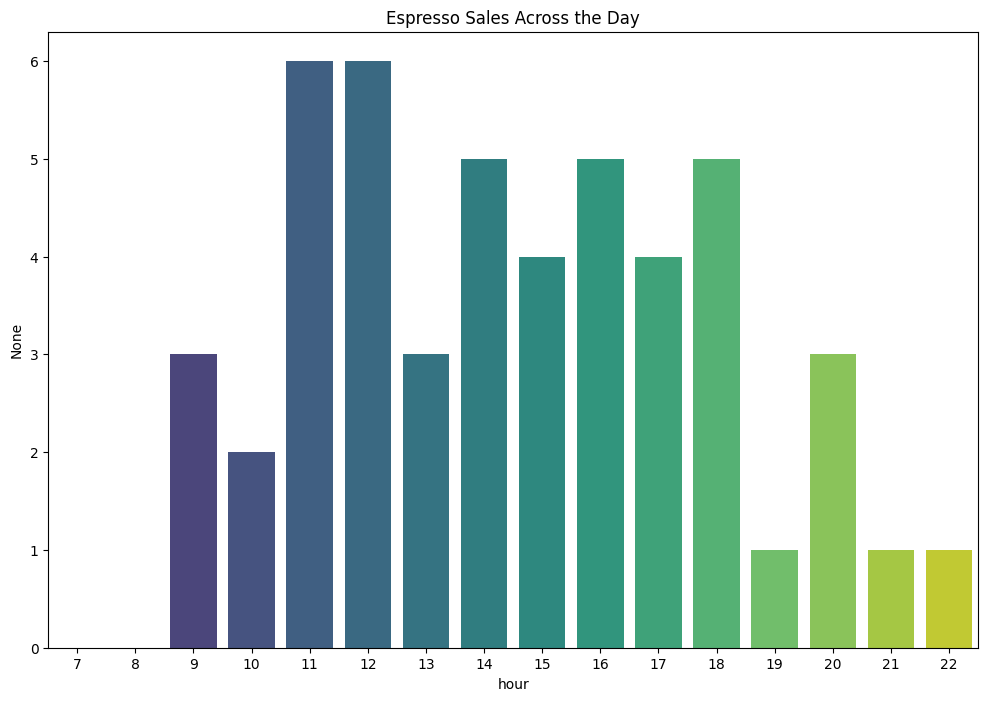

C:\Users\aashi\AppData\Local\Temp\ipykernel_8236\2586202325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales.index, y=sales, palette='viridis')


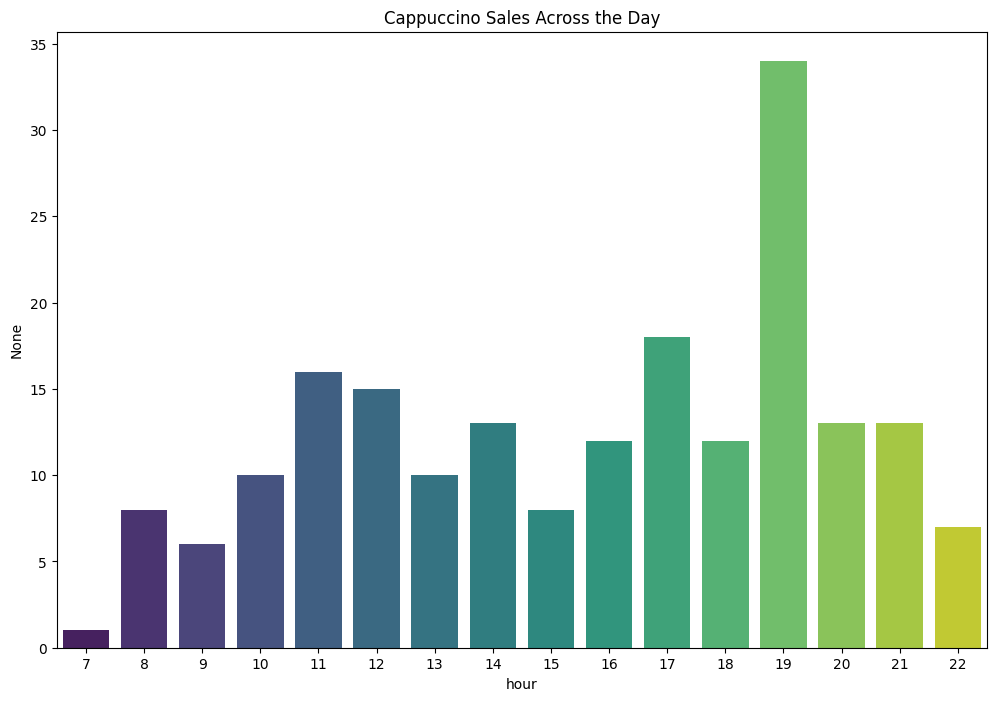

In [97]:
for coffee_name in coffee_names:
    sales = df[df['coffee_name'] == coffee_name].groupby('hour').size()
    sales = sales.reindex(index = range(7,23))
    plt.figure(figsize=(12,8))
    plt.title(f'{coffee_name} Sales Across the Day')
    sns.barplot(x=sales.index, y=sales, palette='viridis')
    plt.show()